In [4]:
from PIL import Image, ImageOps, ImageFilter
from skimage.measure import label, regionprops
from skimage.morphology import square, closing, opening
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display
import os
%matplotlib inline

In [29]:
images = [ Image.open("D:/7 семестр/ЦОСИ/easy/" + im) for im in os.listdir("D:/7 семестр/ЦОСИ/easy")]

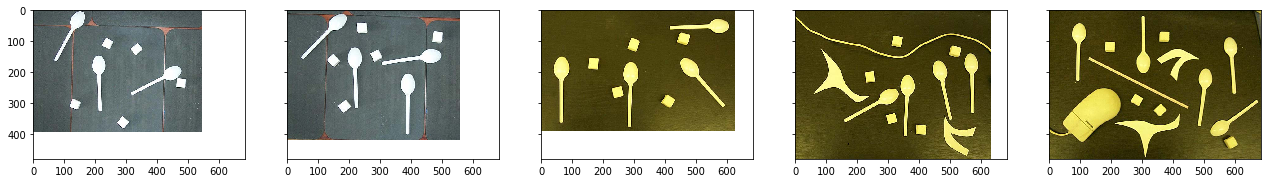

In [30]:
fig, ax1 = plt.subplots(1,len(images), figsize=(22,3), sharex = True, sharey = True)
for num, im in enumerate(images):
    ax1[num].imshow(im)
plt.show()

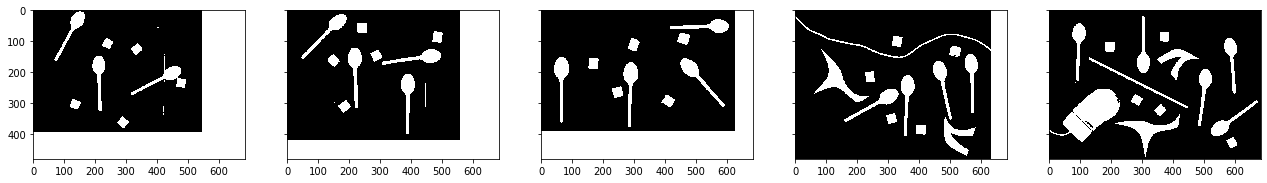

In [40]:
bin_images = [Image.eval(ImageOps.grayscale(im), lambda px: 255 if px > 180 else 0) for im in images]
bin_images = [closing(np.array(im), square(2)) for im in bin_images]
#bin_images = [opening(np.array(im), square(4)) for im in bin_images]
fig, ax1 = plt.subplots(1,len(images), figsize=(22,3), sharex = True, sharey = True)
for num, im in enumerate(bin_images):
    ax1[num].imshow(im, cmap='gray')
plt.show()

In [41]:
label_images = [label(np.array(im)) for im in bin_images]
features = pd.DataFrame(columns=['Image', 'Object', 'Area', 'Perimeter', 'Compactness', 'Major_axis_length','Minor_axis_length', 'Eccentricity'])
items = []
detection = []
for n_im, im in enumerate(label_images):
    i = 0
    region_d = []
    for region in regionprops(im):
        if region.area > 300:
            features = features.append({'Image': n_im, 'Object': i, 'Area':region.area, 'Perimeter':region.perimeter, \
                            'Major_axis_length': region.major_axis_length,'Minor_axis_length': region.minor_axis_length,\
                            'Compactness': ((region.perimeter**2)/region.area), 'Eccentricity':region.eccentricity}, ignore_index=True) 
            region_d += [list(region.bbox)] 
            i += 1
    detection += [region_d]
    items += [i]
print(items)
print(features.head())

D:\Anaconda\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
D:\Anaconda\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


[8, 9, 9, 12, 14]
   Image  Object    Area   Perimeter  Compactness  Major_axis_length  \
0    0.0     0.0  3206.0  425.830519    56.560085         200.316458   
1    0.0     1.0  3573.0  778.723917   169.720386         189.903048   
2    0.0     2.0   779.0  112.225397    16.167573          32.305535   
3    0.0     3.0   810.0  112.267027    15.560352          35.250692   
4    0.0     4.0  3259.0  406.409163    50.680702         197.191761   

   Minor_axis_length  Eccentricity  
0          33.430517      0.985976  
1          83.766931      0.897456  
2          31.902055      0.157553  
3          30.498516      0.501446  
4          33.904781      0.985108  


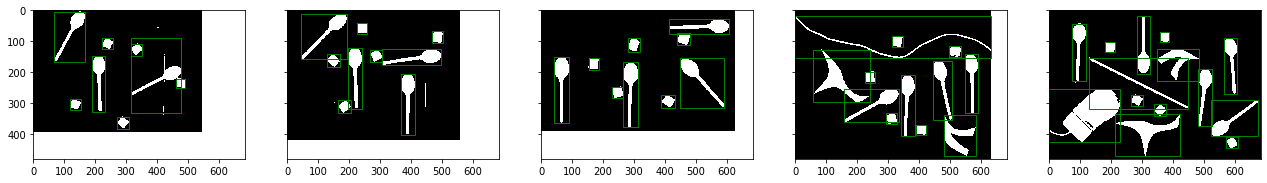

In [42]:
fig, ax1 = plt.subplots(1,len(images), figsize=(22,3), sharex = True, sharey = True)
for num, im in enumerate(bin_images):
    ax1[num].imshow(im, cmap='gray')
    for item in detection[num]:
        rect = mpatches.Rectangle((item[1], item[0]), item[3] - item[1], item[2] - item[0],\
                                  fill=False, edgecolor='green', linewidth=1)
        ax1[num].add_patch(rect)
    
plt.show()

[1 1 0 0 1 0 0 0]
[1 0 0 1 1 0 0 1 0]
[0 1 1 0 1 0 0 1 1]
[3 1 1 2 0 0 1 0 0 1 4 1]
[4 4 2 4 2 0 5 4 1 2 4 2 3 2]


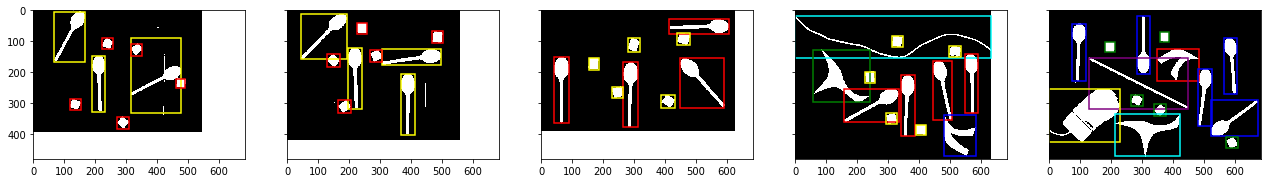

In [44]:
features_list = ['Area', 'Perimeter', 'Compactness', 'Major_axis_length','Minor_axis_length', 'Eccentricity']
clusters = [2, 2, 2, 5, 6]
colors = ['red', 'yellow', 'green', 'cyan', 'blue', 'purple']

fig, ax1 = plt.subplots(1,len(images), figsize=(22,3), sharex = True, sharey = True)
for num, im in enumerate(bin_images):
    ax1[num].imshow(im, cmap='gray')
    km = KMeans(n_clusters=clusters[num], random_state=1)
    km.fit(features[features["Image"] == num].drop(['Image', 'Object'], axis=1))
    print(km.labels_)
    for n_item, item in enumerate(detection[num]):
        rect = mpatches.Rectangle((item[1], item[0]), item[3] - item[1], item[2] - item[0],\
                                  fill=False, edgecolor=colors[km.labels_[n_item]], linewidth=1.5)
        ax1[num].add_patch(rect)
    
plt.show()


<function matplotlib.pyplot.show>

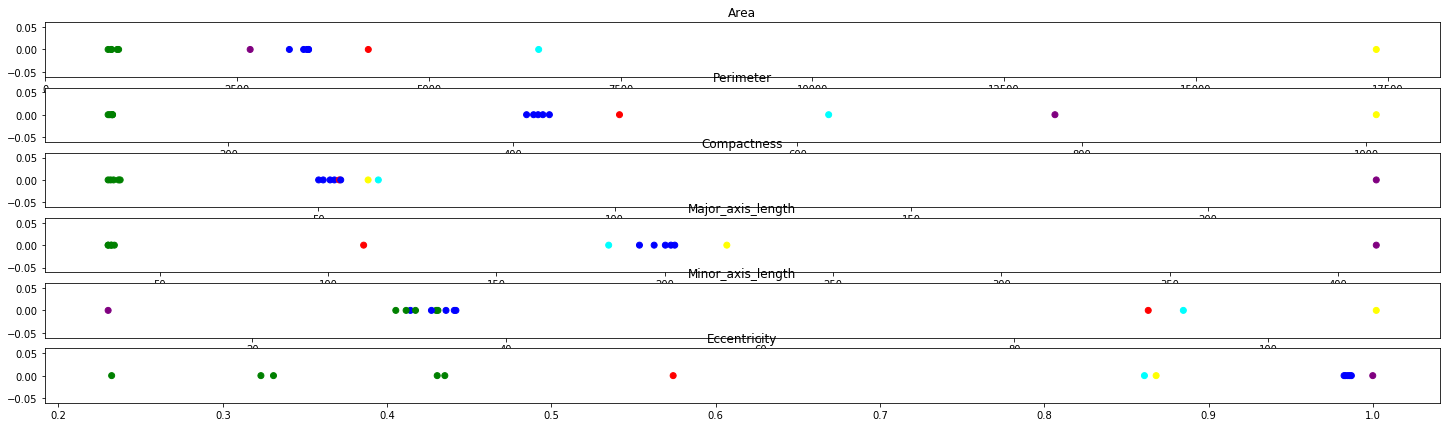

In [45]:
fig, ax = plt.subplots(len(features_list), 1, figsize=(25,7))
for i in range(len(features_list)):
    ax[i].scatter(features[features["Image"] == 4][features_list[i]], [0]*items[4], \
                  c = [colors[lbl] for lbl in km.labels_])
    ax[i].title.set_text(features_list[i])
plt.show

[1 1 0 0 1 0 0 0]
[1 0 0 1 1 0 0 1 0]
[0 1 1 0 1 0 0 1 1]
[3 1 1 2 0 0 1 0 0 1 4 1]
[4 4 2 4 2 0 5 4 1 2 4 2 3 2]


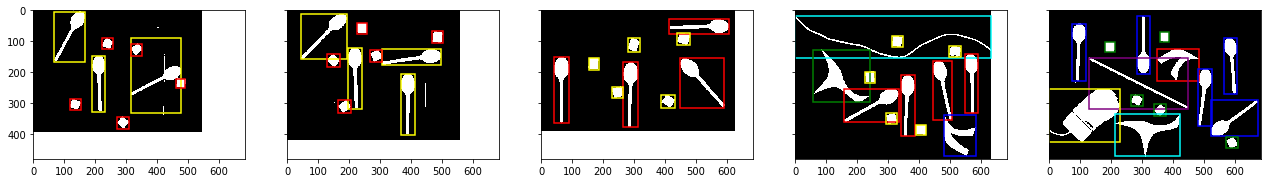

In [49]:
features_list2 = ['Area', 'Perimeter', 'Major_axis_length']
fig, ax1 = plt.subplots(1,len(images), figsize=(22,3), sharex = True, sharey = True)
for num, im in enumerate(bin_images):
    ax1[num].imshow(im, cmap='gray')
    km = KMeans(n_clusters=clusters[num], random_state=1)
    km.fit(features[features["Image"] == num][features_list2])
    print(km.labels_)
    for n_item, item in enumerate(detection[num]):
        rect = mpatches.Rectangle((item[1], item[0]), item[3] - item[1], item[2] - item[0],\
                                  fill=False, edgecolor=colors[km.labels_[n_item]], linewidth=1.5)
        ax1[num].add_patch(rect)

plt.show()
